### Mini Project --- Earthquake

# Clustering data
Dataset from Kaggle : **"Earthquake Damage Prediction"**  
Source: https://www.drivendata.org/competitions/57/nepal-earthquake/data/ (requires login)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
raw_data = pd.read_csv('train_values.csv')
##setting building_id as the index for easy referencing
raw_data = raw_data.set_index('building_id')
y_train = pd.read_csv('train_labels.csv')
y_train = y_train.set_index('building_id')
y_train.head()

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


#### Reading up the data types so we are able to sort it out in terms of categorial, numerical data

In [3]:
raw_data.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

#### Checking for the number of values to ensure that there is no missing data

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

#### Damage_score calculations

In [5]:
variables_dropped = ['geo_level_1_id', 'geo_level_2_id','geo_level_3_id', 'legal_ownership_status',
                    'count_families', 'has_secondary_use', 'has_secondary_use_agriculture','has_secondary_use_hotel',
                     'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school',
                    'has_secondary_use_industry', 'has_secondary_use_health_post','has_secondary_use_gov_office',
                    'has_secondary_use_use_police','has_secondary_use_other']
score_calculation = pd.DataFrame(raw_data.drop(variables_dropped, axis=1))
## Converting remaining data as a category type data
#score_calculation = score_calculation.astype('category')
score_calculation.head()


,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,...,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,2,30,6,5,t,r,n,f,q,t,...,1,0,0,0,0,0,0,0,0,0
28830,2,10,8,7,o,r,n,x,q,s,...,1,0,0,0,0,0,0,0,0,0
94947,2,10,5,5,t,r,n,f,x,t,...,1,0,0,0,0,0,0,0,0,0
590882,2,10,6,5,t,r,n,f,x,s,...,1,0,0,0,0,1,1,0,0,0
201944,3,30,8,9,t,r,n,f,x,s,...,0,0,0,0,0,0,0,0,0,0


### Converting the cateogrical into a rubricks, trying out for the variavle age

Ratioanle of this scoring system:
1. Assuming an equal earthquake throughout, a younger building , lower ```age``` will actually have a lower chance of it collapse, so the score it will get
2. Score a higher score system will mean it will have complete destruction given the fact that there is weaker
3. Summary: Lower Score ==  Stronger, higher score ==  Weaker

In [6]:
## Setting up of conditions for sorting, 10 grading system
#, 'count_floors_pre_eq', 'area_percentage','height_percentage']

    
age_conditions = [(score_calculation['age'] <= 20),
              (score_calculation['age'] <= 40) & (score_calculation['age'] > 20),
              (score_calculation['age'] <= 60) & (score_calculation['age'] > 40),
              (score_calculation['age'] <= 80) & (score_calculation['age'] > 60),
              (score_calculation['age'] <= 100) & (score_calculation['age'] > 80),
              (score_calculation['age'] <= 120) & (score_calculation['age'] > 100),
              (score_calculation['age'] <= 140) & (score_calculation['age'] > 120),
              (score_calculation['age'] <= 160) & (score_calculation['age'] > 140),
              (score_calculation['age'] <= 180) & (score_calculation['age'] > 160),
              (score_calculation['age'] <= 200) & (score_calculation['age'] > 180)]
age_score = [1,2,3,4,5,6,7,8,9,10]

count_floors_pre_eq_conditions = [(score_calculation['count_floors_pre_eq'] == 1),
                   (score_calculation['count_floors_pre_eq'] == 2),
                   (score_calculation['count_floors_pre_eq'] == 3),
                   (score_calculation['count_floors_pre_eq'] == 4),
                   (score_calculation['count_floors_pre_eq'] == 5),
                   (score_calculation['count_floors_pre_eq'] == 6),
                   (score_calculation['count_floors_pre_eq'] == 7),
                   (score_calculation['count_floors_pre_eq'] == 8),
                   (score_calculation['count_floors_pre_eq'] == 9)]
count_floors_pre_eq_score = [1,2,3,4,5,6,7,8,9]

area_percentage_score = [10,9,8,7,6,5,4,3,2,1]
area_percentage_conditions = [(score_calculation['area_percentage'] <=5),
                   (score_calculation['area_percentage'] <= 10) & (score_calculation['area_percentage'] >5),
                   (score_calculation['area_percentage'] <= 15) & (score_calculation['area_percentage'] >10),
                   (score_calculation['area_percentage'] <= 20) & (score_calculation['area_percentage'] >15),
                   (score_calculation['area_percentage'] <= 25) & (score_calculation['area_percentage'] >20),
                   (score_calculation['area_percentage'] <= 30) & (score_calculation['area_percentage'] >25),
                   (score_calculation['area_percentage'] <= 35) & (score_calculation['area_percentage'] >30),
                   (score_calculation['area_percentage'] <= 40) & (score_calculation['area_percentage'] >35),
                   (score_calculation['area_percentage'] <= 45) & (score_calculation['area_percentage'] >40),
                   (score_calculation['area_percentage'] <= 50) & (score_calculation['area_percentage'] >45)]

height_percentage_score = [1,2,3,4,5,6,7,8,9,10]
height_percentage_conditions = [(score_calculation['height_percentage'] <=3),
                     (score_calculation['height_percentage'] <= 6) & (score_calculation['height_percentage'] >3),
                     (score_calculation['height_percentage'] <= 9) & (score_calculation['height_percentage'] >6),
                     (score_calculation['height_percentage'] <= 12) & (score_calculation['height_percentage'] >9),
                     (score_calculation['height_percentage'] <= 15) & (score_calculation['height_percentage'] >12),
                     (score_calculation['height_percentage'] <= 18) & (score_calculation['height_percentage'] >15),
                     (score_calculation['height_percentage'] <= 21) & (score_calculation['height_percentage'] >18),
                     (score_calculation['height_percentage'] <= 24) & (score_calculation['height_percentage'] >21),
                     (score_calculation['height_percentage'] <= 27) & (score_calculation['height_percentage'] >24),
                     (score_calculation['height_percentage'] <= 31) & (score_calculation['height_percentage'] >27),]

original_columns= ['age','count_floors_pre_eq','area_percentage','height_percentage']
column_variables= ['age_score','count_floors_pre_eq_score','area_percentage_score','height_percentage_score']
condition_variables = [age_conditions,count_floors_pre_eq_conditions,area_percentage_conditions,height_percentage_conditions]
score_variables= [age_score,count_floors_pre_eq_score,area_percentage_score,height_percentage_score]

for count in range(4) :
    score_calculation[column_variables[count]] = np.select(condition_variables[count],score_variables[count])

score_calculation['total_score'] = pd.DataFrame(score_calculation[column_variables].sum(axis=1))
x_train = pd.DataFrame(score_calculation.drop(column_variables, axis=1))
x_train = pd.DataFrame(x_train.drop(original_columns, axis=1))
x_train.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,total_score
building_id,,,,,,,,,,,,,,,,,,,
802906,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,15
28830,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,15
94947,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,15
590882,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,14
201944,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,17


### To get dummy variables and columns --  prepartion for classificaition model

###### Converting columns with category values into dummies so that random forest can handle the data

data_convert = pd.get_dummies(data_drop, columns = ['Sex','Team','Sport', 'Year'], dummy_na = False)

In [7]:
categorical_variables = ['land_surface_condition', 'foundation_type',
                         'roof_type','ground_floor_type','other_floor_type',
                         'position', 'plan_configuration']
                         
x_train_convert = pd.get_dummies(x_train, columns = categorical_variables, dummy_na=False)
x_train_convert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 46 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   has_superstructure_adobe_mud            260601 non-null  int64
 1   has_superstructure_mud_mortar_stone     260601 non-null  int64
 2   has_superstructure_stone_flag           260601 non-null  int64
 3   has_superstructure_cement_mortar_stone  260601 non-null  int64
 4   has_superstructure_mud_mortar_brick     260601 non-null  int64
 5   has_superstructure_cement_mortar_brick  260601 non-null  int64
 6   has_superstructure_timber               260601 non-null  int64
 7   has_superstructure_bamboo               260601 non-null  int64
 8   has_superstructure_rc_non_engineered    260601 non-null  int64
 9   has_superstructure_rc_engineered        260601 non-null  int64
 10  has_superstructure_other                260601 non-null  int64


#### Application of Random Forest

In [17]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 400, random_state = 45)

# Train the model on training data
rf.fit(x_train_convert, np.ravel(y_train))

RandomForestClassifier(n_estimators=400, random_state=45)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6380827395136627



<AxesSubplot:>

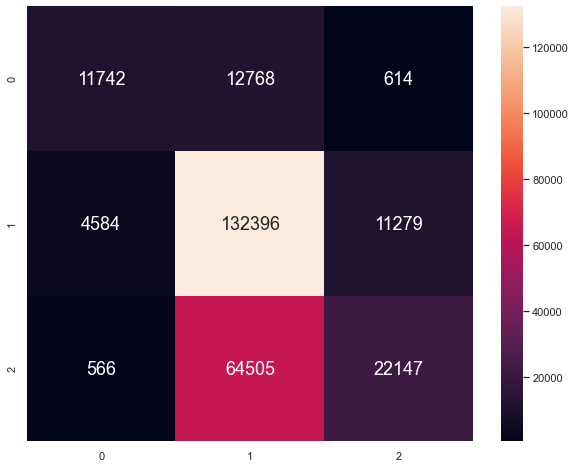

In [19]:
from sklearn.metrics import confusion_matrix

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf.score(x_train_convert, np.ravel(y_train)))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(figsize=(10, 8))
sb.heatmap(confusion_matrix(np.ravel(y_train), rf.predict(x_train_convert)),
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [23]:
y_completed = pd.DataFrame(y_train)
y_completed['Predicted']= rf.predict(x_train_convert)

,damage_grade,Predicted
building_id,,
802906,3,2
28830,2,2
94947,3,3
590882,2,2
201944,3,2
